In [93]:
""" %pip install -q -r requirements.txt
%pip install install folium
%pip install install geopy
%pip install install geopandas """

' %pip install -q -r requirements.txt\n%pip install install folium\n%pip install install geopy\n%pip install install geopandas '

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import requests
import folium
from folium import plugins
from folium.plugins import HeatMap
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
from geopy.exc import GeocoderTimedOut, GeocoderQuotaExceeded, GeocoderUnavailable, GeocoderServiceError
import geopandas as gpd
from shapely.geometry import Point, Polygon
from sklearn.cluster import KMeans
from folium.plugins import MarkerCluster


In [95]:
df = pd.read_csv('Motor_Vehicle_Collisions_-_Crashes.csv', encoding='latin1', low_memory=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2070594 entries, 0 to 2070593
Data columns (total 29 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   CRASH DATE                     object 
 1   CRASH TIME                     object 
 2   BOROUGH                        object 
 3   ZIP CODE                       object 
 4   LATITUDE                       float64
 5   LONGITUDE                      float64
 6   LOCATION                       object 
 7   ON STREET NAME                 object 
 8   CROSS STREET NAME              object 
 9   OFF STREET NAME                object 
 10  NUMBER OF PERSONS INJURED      float64
 11  NUMBER OF PERSONS KILLED       float64
 12  NUMBER OF PEDESTRIANS INJURED  int64  
 13  NUMBER OF PEDESTRIANS KILLED   int64  
 14  NUMBER OF CYCLIST INJURED      int64  
 15  NUMBER OF CYCLIST KILLED       int64  
 16  NUMBER OF MOTORIST INJURED     int64  
 17  NUMBER OF MOTORIST KILLED      int64  
 18  CO

In [96]:
df.describe()

,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,COLLISION_ID
count,1.837243e+06,1.837243e+06,2.070576e+06,2.070563e+06,2.070594e+06,2.070594e+06,2.070594e+06,2.070594e+06,2.070594e+06,2.070594e+06,2.070594e+06
mean,4.062766e+01,-7.375207e+01,3.092516e-01,1.489933e-03,5.644081e-02,7.394014e-04,2.675319e-02,1.144599e-04,2.224569e-01,6.128676e-04,3.156009e+06
std,1.981063e+00,3.724374e+00,6.995985e-01,4.071506e-02,2.438824e-01,2.765745e-02,1.633632e-01,1.074303e-02,6.607131e-01,2.709606e-02,1.505039e+06
min,0.000000e+00,-2.013600e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.200000e+01
25%,4.066782e+01,-7.397485e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.153768e+06
50%,4.072084e+01,-7.392727e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.671536e+06
75%,4.076960e+01,-7.386673e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.189428e+06
max,4.334444e+01,0.000000e+00,4.300000e+01,8.000000e+00,2.700000e+01,6.000000e+00,4.000000e+00,2.000000e+00,4.300000e+01,5.000000e+00,4.707442e+06


In [97]:
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
CRASH DATE,09/11/2021,03/26/2022,06/29/2022,09/11/2021,12/14/2021,04/14/2021,12/14/2021,12/14/2021,12/14/2021,12/14/2021
CRASH TIME,2:39,11:45,6:55,9:35,8:13,12:47,17:05,8:17,21:10,14:58
BOROUGH,NaN,NaN,NaN,BROOKLYN,BROOKLYN,NaN,NaN,BRONX,BROOKLYN,MANHATTAN
ZIP CODE,NaN,NaN,NaN,11208,11233,NaN,NaN,10475,11207,10017
LATITUDE,NaN,NaN,NaN,40.667202,40.683304,NaN,40.709183,40.86816,40.67172,40.75144
LONGITUDE,NaN,NaN,NaN,-73.8665,-73.917274,NaN,-73.956825,-73.83148,-73.8971,-73.97397
LOCATION,NaN,NaN,NaN,"(40.667202, -73.8665)","(40.683304, -73.917274)",NaN,"(40.709183, -73.956825)","(40.86816, -73.83148)","(40.67172, -73.8971)","(40.75144, -73.97397)"
ON STREET NAME,WHITESTONE EXPRESSWAY,QUEENSBORO BRIDGE UPPER,THROGS NECK BRIDGE,NaN,SARATOGA AVENUE,MAJOR DEEGAN EXPRESSWAY RAMP,BROOKLYN QUEENS EXPRESSWAY,NaN,NaN,3 AVENUE
CROSS STREET NAME,20 AVENUE,NaN,NaN,NaN,DECATUR STREET,NaN,NaN,NaN,NaN,EAST 43 STREET
OFF STREET NAME,NaN,NaN,NaN,1211 LORING AVENUE,NaN,NaN,NaN,344 BAYCHESTER AVENUE,2047 PITKIN AVENUE,NaN


In [98]:
for i in range(1,6):
    df_cfv = df["CONTRIBUTING FACTOR VEHICLE "+str(i)].value_counts()
    print(f"===================== Contributing factor {i} =============================")
    print(df_cfv)

===================== Contributing factor 1 =============================
CONTRIBUTING FACTOR VEHICLE 1
Unspecified                       705582
Driver Inattention/Distraction    414046
Failure to Yield Right-of-Way     122943
Following Too Closely             110620
Backing Unsafely                   76582
                                   ...  
Windshield Inadequate                 80
Cell Phone (hand-held)                79
Texting                               51
Listening/Using Headphones            24
1                                     10
Name: count, Length: 61, dtype: int64
===================== Contributing factor 2 =============================
CONTRIBUTING FACTOR VEHICLE 2
Unspecified                       1473382
Driver Inattention/Distraction      94041
Other Vehicular                     31999
Following Too Closely               18977
Failure to Yield Right-of-Way       17088
                                   ...   
Eating or Drinking                     11
Listening

In [99]:
df.drop(['CONTRIBUTING FACTOR VEHICLE 3','CONTRIBUTING FACTOR VEHICLE 4','CONTRIBUTING FACTOR VEHICLE 5'],axis=1,inplace=True)
df.drop(['VEHICLE TYPE CODE 3','VEHICLE TYPE CODE 4','VEHICLE TYPE CODE 5'],axis=1,inplace=True)
df.drop(['OFF STREET NAME', 'CROSS STREET NAME'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2070594 entries, 0 to 2070593
Data columns (total 21 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   CRASH DATE                     object 
 1   CRASH TIME                     object 
 2   BOROUGH                        object 
 3   ZIP CODE                       object 
 4   LATITUDE                       float64
 5   LONGITUDE                      float64
 6   LOCATION                       object 
 7   ON STREET NAME                 object 
 8   NUMBER OF PERSONS INJURED      float64
 9   NUMBER OF PERSONS KILLED       float64
 10  NUMBER OF PEDESTRIANS INJURED  int64  
 11  NUMBER OF PEDESTRIANS KILLED   int64  
 12  NUMBER OF CYCLIST INJURED      int64  
 13  NUMBER OF CYCLIST KILLED       int64  
 14  NUMBER OF MOTORIST INJURED     int64  
 15  NUMBER OF MOTORIST KILLED      int64  
 16  CONTRIBUTING FACTOR VEHICLE 1  object 
 17  CONTRIBUTING FACTOR VEHICLE 2  object 
 18  CO

In [100]:
df['VEHICLE TYPE CODE 1'] = df['VEHICLE TYPE CODE 1'].str.lower()  # Convert to lowercase
df['VEHICLE TYPE CODE 1'] = df['VEHICLE TYPE CODE 1'].str.strip()  # Remove leading/trailing white
df['VEHICLE TYPE CODE 2'] = df['VEHICLE TYPE CODE 2'].str.lower()  # Convert to lowercase
df['VEHICLE TYPE CODE 2'] = df['VEHICLE TYPE CODE 2'].str.strip()  # Remove leading/trailing white

In [101]:
v_type1 = df['VEHICLE TYPE CODE 1'].value_counts()
v_type2 = df['VEHICLE TYPE CODE 2'].value_counts()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'sedan'),
  Text(1, 0, 'station wagon/sport utility vehicle'),
  Text(2, 0, 'passenger vehicle'),
  Text(3, 0, 'sport utility / station wagon'),
  Text(4, 0, 'taxi'),
  Text(5, 0, 'pick-up truck'),
  Text(6, 0, '4 dr sedan'),
  Text(7, 0, 'bus'),
  Text(8, 0, 'van'),
  Text(9, 0, 'box truck')])

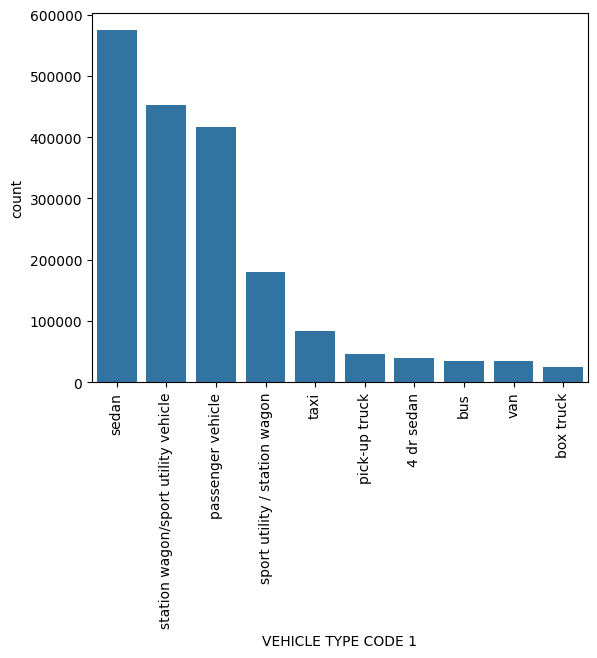

In [102]:
sns.barplot(v_type1[0:10])
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'sedan'),
  Text(1, 0, 'station wagon/sport utility vehicle'),
  Text(2, 0, 'passenger vehicle'),
  Text(3, 0, 'sport utility / station wagon'),
  Text(4, 0, 'unknown'),
  Text(5, 0, 'taxi'),
  Text(6, 0, 'pick-up truck'),
  Text(7, 0, 'van'),
  Text(8, 0, 'bike'),
  Text(9, 0, 'bus')])

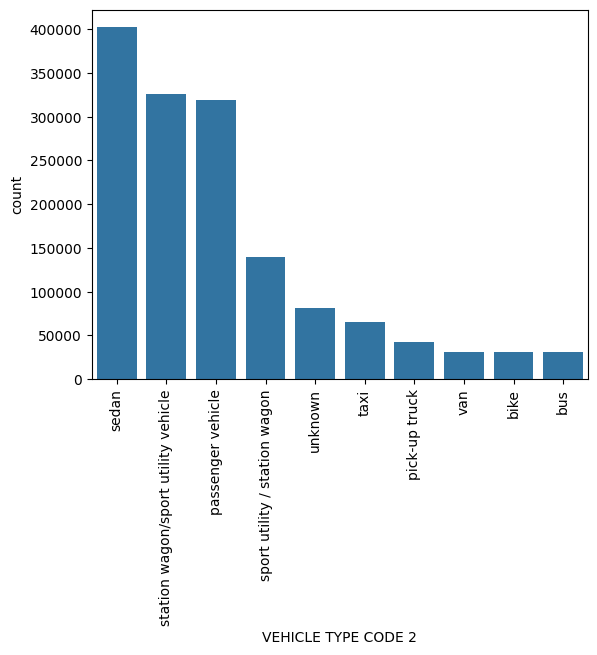

In [103]:
sns.barplot(v_type2[0:10])
plt.xticks(rotation=90)

In [104]:
df['CONTRIBUTING FACTOR VEHICLE 1'] = df['CONTRIBUTING FACTOR VEHICLE 1'].str.lower()  # Convert to lowercase
df['CONTRIBUTING FACTOR VEHICLE 1'] = df['CONTRIBUTING FACTOR VEHICLE 1'].str.strip()  # Remove leading/trailing whitespaces

borough_counts = df['BOROUGH'].value_counts()
contributing_factor_counts = df['CONTRIBUTING FACTOR VEHICLE 1'].value_counts()

In [105]:
df_no_locs = df[df['LOCATION'].isna()]
df_street_names = df_no_locs[df_no_locs['ON STREET NAME'].notna()].shape

In [106]:
print("Borough counts:")
print(borough_counts)
print("\nContributing Factor counts:")
print(contributing_factor_counts)

Borough counts:
BOROUGH
BROOKLYN         453525
QUEENS           382467
MANHATTAN        319677
BRONX            210812
STATEN ISLAND     59876
Name: count, dtype: int64

Contributing Factor counts:
CONTRIBUTING FACTOR VEHICLE 1
unspecified                                              705582
driver inattention/distraction                           414046
failure to yield right-of-way                            122943
following too closely                                    110620
backing unsafely                                          76582
other vehicular                                           64252
passing or lane usage improper                            57646
passing too closely                                       51525
turning improperly                                        51127
fatigued/drowsy                                           47397
unsafe lane changing                                      40669
traffic control disregarded                               36728
dri

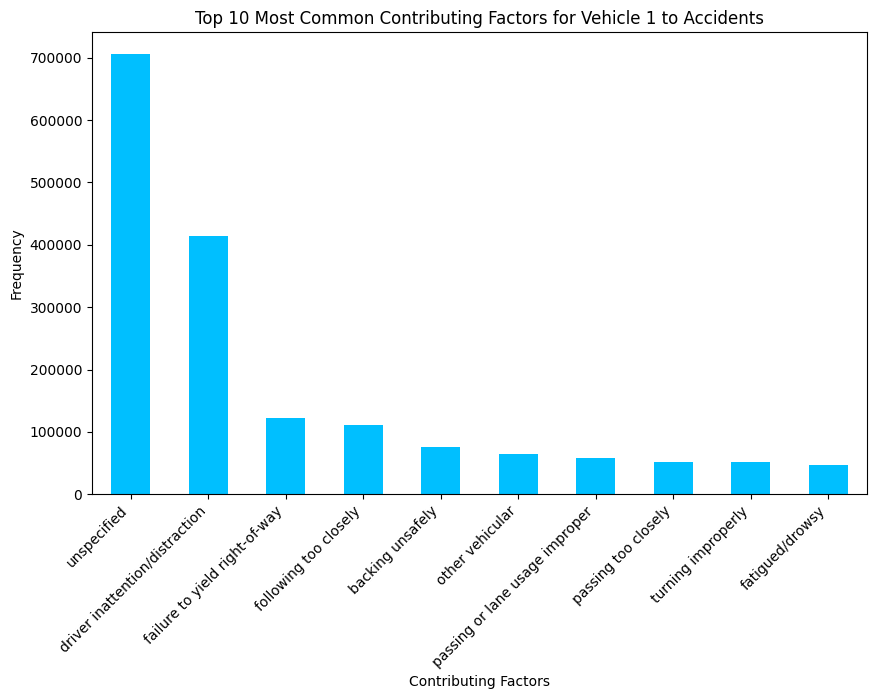

In [107]:
plt.figure(figsize=(10, 6))
contributing_factor_counts.head(10).plot(kind='bar', color='deepskyblue')
plt.title('Top 10 Most Common Contributing Factors for Vehicle 1 to Accidents')
plt.xlabel('Contributing Factors')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

In [108]:
df['CONTRIBUTING FACTOR VEHICLE 2'] = df['CONTRIBUTING FACTOR VEHICLE 2'].str.lower()  # Convert to lowercase
df['CONTRIBUTING FACTOR VEHICLE 2'] = df['CONTRIBUTING FACTOR VEHICLE 2'].str.strip()  # Remove leading/trailing whitespaces

contributing_factor_counts2 = df['CONTRIBUTING FACTOR VEHICLE 2'].value_counts()

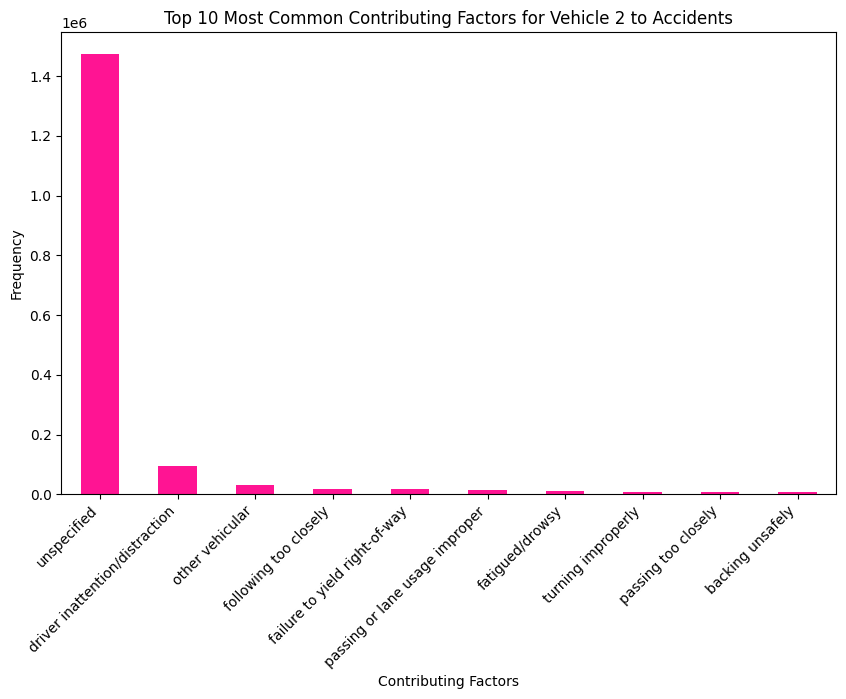

In [109]:
plt.figure(figsize=(10, 6))
contributing_factor_counts2.head(10).plot(kind='bar', color='deeppink')
plt.title('Top 10 Most Common Contributing Factors for Vehicle 2 to Accidents')
plt.xlabel('Contributing Factors')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

In [110]:
df['CRASH DATE'] = pd.to_datetime(df['CRASH DATE'])

In [111]:
df['CRASH TIME'] = pd.to_datetime(df['CRASH TIME'], format='%H:%M')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2070594 entries, 0 to 2070593
Data columns (total 21 columns):
 #   Column                         Dtype         
---  ------                         -----         
 0   CRASH DATE                     datetime64[ns]
 1   CRASH TIME                     datetime64[ns]
 2   BOROUGH                        object        
 3   ZIP CODE                       object        
 4   LATITUDE                       float64       
 5   LONGITUDE                      float64       
 6   LOCATION                       object        
 7   ON STREET NAME                 object        
 8   NUMBER OF PERSONS INJURED      float64       
 9   NUMBER OF PERSONS KILLED       float64       
 10  NUMBER OF PEDESTRIANS INJURED  int64         
 11  NUMBER OF PEDESTRIANS KILLED   int64         
 12  NUMBER OF CYCLIST INJURED      int64         
 13  NUMBER OF CYCLIST KILLED       int64         
 14  NUMBER OF MOTORIST INJURED     int64         
 15  NUMBER OF MOTOR

In [112]:
df['Day of Week'] = df['CRASH DATE'].dt.day_name()
df['Month'] = df['CRASH DATE'].dt.month
df['Year'] = df['CRASH DATE'].dt.year
df['Hour'] = df['CRASH TIME'].dt.hour
df.head(5)

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,...,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,Day of Week,Month,Year,Hour
0,2021-09-11,1900-01-01 02:39:00,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,2.0,0.0,...,0,aggressive driving/road rage,unspecified,4455765,sedan,sedan,Saturday,9,2021,2
1,2022-03-26,1900-01-01 11:45:00,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,1.0,0.0,...,0,pavement slippery,NaN,4513547,sedan,NaN,Saturday,3,2022,11
2,2022-06-29,1900-01-01 06:55:00,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,0.0,0.0,...,0,following too closely,unspecified,4541903,sedan,pick-up truck,Wednesday,6,2022,6
3,2021-09-11,1900-01-01 09:35:00,BROOKLYN,11208,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,0.0,0.0,...,0,unspecified,NaN,4456314,sedan,NaN,Saturday,9,2021,9
4,2021-12-14,1900-01-01 08:13:00,BROOKLYN,11233,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,0.0,0.0,...,0,NaN,NaN,4486609,NaN,NaN,Tuesday,12,2021,8


In [113]:
df = df.dropna(subset=['LATITUDE', 'LONGITUDE'])
df.isnull().sum()

CRASH DATE                            0
CRASH TIME                            0
BOROUGH                          447751
ZIP CODE                         447975
LATITUDE                              0
LONGITUDE                             0
LOCATION                              0
ON STREET NAME                   383090
NUMBER OF PERSONS INJURED            16
NUMBER OF PERSONS KILLED             28
NUMBER OF PEDESTRIANS INJURED         0
NUMBER OF PEDESTRIANS KILLED          0
NUMBER OF CYCLIST INJURED             0
NUMBER OF CYCLIST KILLED              0
NUMBER OF MOTORIST INJURED            0
NUMBER OF MOTORIST KILLED             0
CONTRIBUTING FACTOR VEHICLE 1      6166
CONTRIBUTING FACTOR VEHICLE 2    290169
COLLISION_ID                          0
VEHICLE TYPE CODE 1               12443
VEHICLE TYPE CODE 2              360481
Day of Week                           0
Month                                 0
Year                                  0
Hour                                  0


In [114]:
day_of_week_counts = df['Day of Week'].value_counts().sort_index()

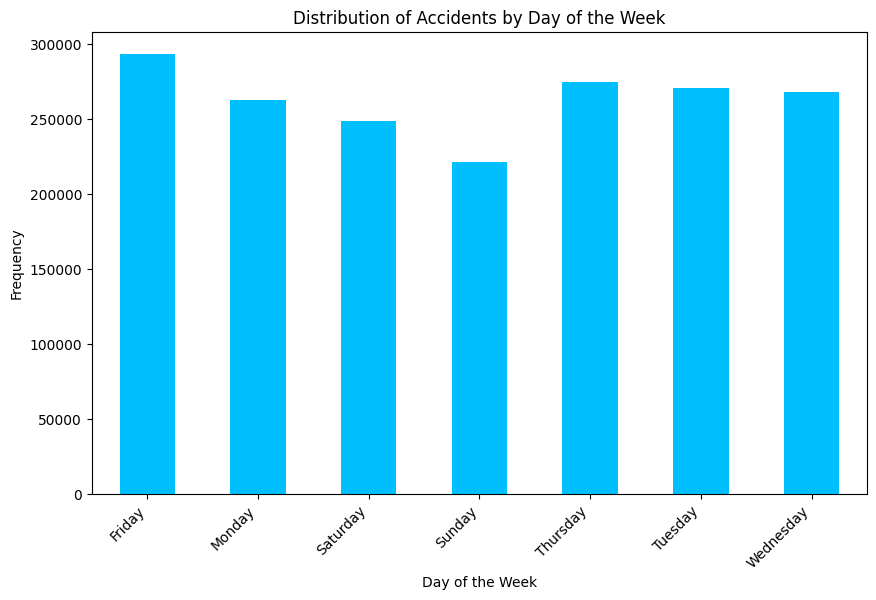

In [115]:
plt.figure(figsize=(10, 6))
day_of_week_counts.plot(kind='bar', color='deepskyblue')
plt.title('Distribution of Accidents by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

In [116]:
month_counts = df['Month'].value_counts().sort_index()

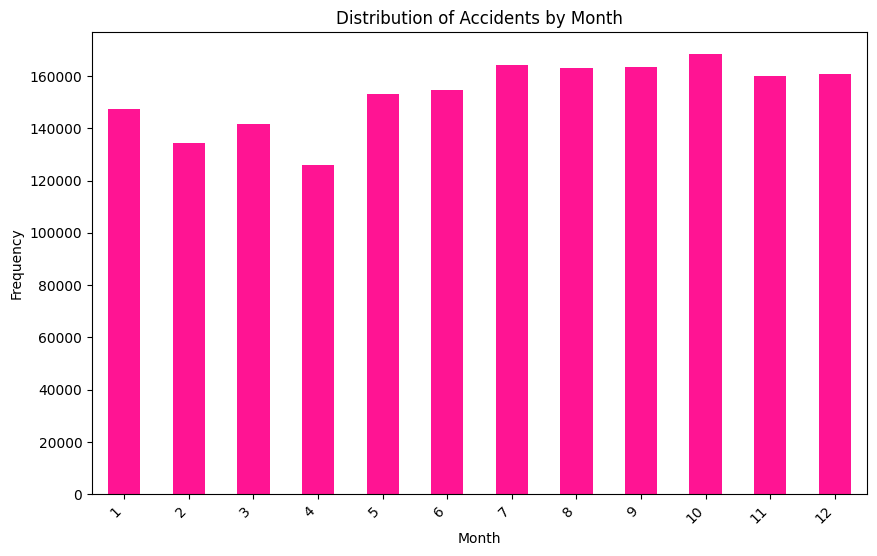

In [117]:
plt.figure(figsize=(10, 6))
month_counts.plot(kind='bar', color='deeppink')
plt.title('Distribution of Accidents by Month')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

In [118]:
year_counts = df['Year'].value_counts().sort_index()

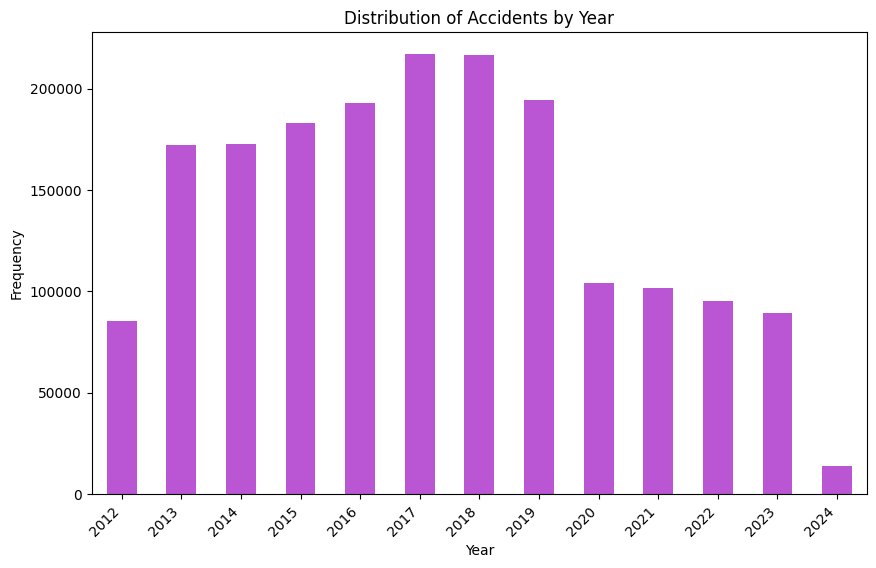

In [119]:
plt.figure(figsize=(10, 6))
year_counts.plot(kind='bar', color='mediumorchid')
plt.title('Distribution of Accidents by Year')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

In [120]:
hour_counts = df['Hour'].value_counts().sort_index()

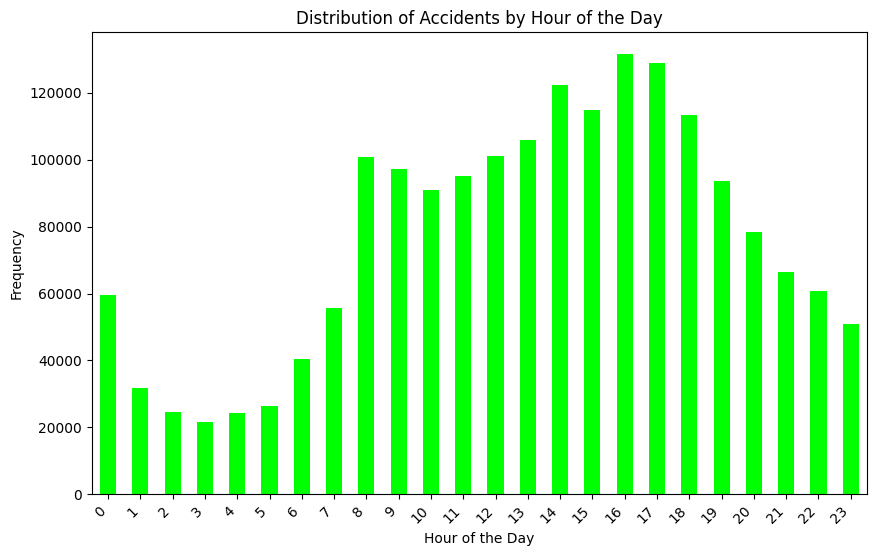

In [121]:
plt.figure(figsize=(10, 6))
hour_counts.plot(kind='bar', color='lime')
plt.title('Distribution of Accidents by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

In [122]:
def replace_with_cluster_center(row):
    # Calculate squared distances between row coordinates and cluster centers using vectorized operations
    cluster_distances = np.sum((cluster_centers - np.array([row['LATITUDE'], row['LONGITUDE']]))**2, axis=1)
    
    # Find the index of the nearest cluster
    nearest_cluster_index = np.argmin(cluster_distances)
    
    # Assign the nearest cluster index to the 'Cluster' column
    row['Cluster'] = nearest_cluster_index
    
    return row

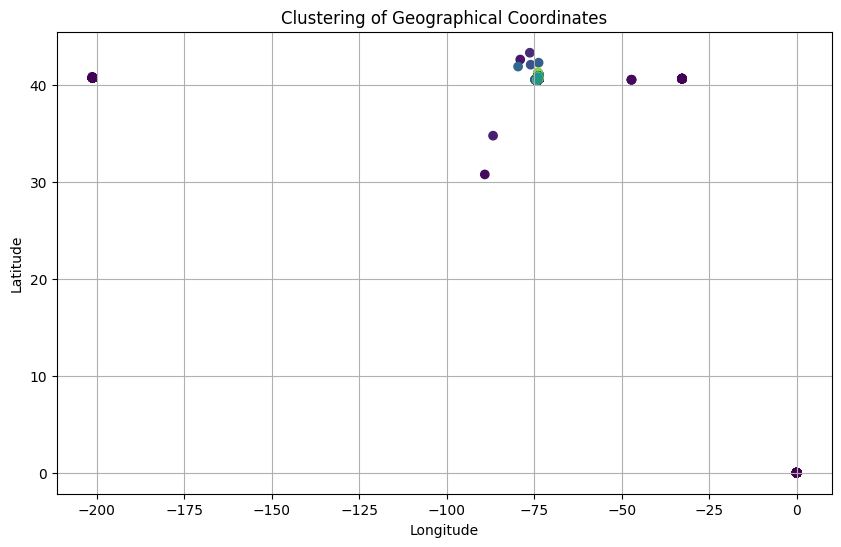

In [123]:
# Assuming df is your DataFrame with 'LATITUDE' and 'LONGITUDE' columns
X = df[['LATITUDE', 'LONGITUDE']].to_numpy() # Convert to NumPy array for efficiency

n_clusters = 500 # Example number of clusters, adjust based on your data

# Fit the KMeans model
kmeans = KMeans(n_clusters=n_clusters, random_state=10)
kmeans.fit(X)

# Assign each point to its cluster
df['Cluster'] = kmeans.labels_

# Example of assigning clusters to boroughs (this step requires domain knowledge)
borough_mapping = {0: 'BROOKLYN', 1: 'QUEENS', 2: 'MANHATTAN', 3: 'BRONX', 4: 'STATEN ISLAND'}
df['Borough'] = df['Cluster'].map(borough_mapping)

# Plotting the clusters (optional)
plt.figure(figsize=(10, 6))
plt.scatter(df['LONGITUDE'], df['LATITUDE'], c=df['Cluster'], cmap='viridis')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Clustering of Geographical Coordinates')
plt.grid(True)
plt.show()

In [124]:
df.head(10)

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,...,CONTRIBUTING FACTOR VEHICLE 2,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,Day of Week,Month,Year,Hour,Cluster,Borough
3,2021-09-11,1900-01-01 09:35:00,BROOKLYN,11208,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,0.0,0.0,...,NaN,4456314,sedan,NaN,Saturday,9,2021,9,348,NaN
4,2021-12-14,1900-01-01 08:13:00,BROOKLYN,11233,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,0.0,0.0,...,NaN,4486609,NaN,NaN,Tuesday,12,2021,8,296,NaN
6,2021-12-14,1900-01-01 17:05:00,NaN,NaN,40.709183,-73.956825,"(40.709183, -73.956825)",BROOKLYN QUEENS EXPRESSWAY,0.0,0.0,...,unspecified,4486555,sedan,tractor truck diesel,Tuesday,12,2021,17,351,NaN
7,2021-12-14,1900-01-01 08:17:00,BRONX,10475,40.868160,-73.831480,"(40.86816, -73.83148)",NaN,2.0,0.0,...,unspecified,4486660,sedan,sedan,Tuesday,12,2021,8,44,NaN
8,2021-12-14,1900-01-01 21:10:00,BROOKLYN,11207,40.671720,-73.897100,"(40.67172, -73.8971)",NaN,0.0,0.0,...,unspecified,4487074,sedan,NaN,Tuesday,12,2021,21,463,NaN
9,2021-12-14,1900-01-01 14:58:00,MANHATTAN,10017,40.751440,-73.973970,"(40.75144, -73.97397)",3 AVENUE,0.0,0.0,...,unspecified,4486519,sedan,station wagon/sport utility vehicle,Tuesday,12,2021,14,111,NaN
10,2021-12-13,1900-01-01 00:34:00,NaN,NaN,40.701275,-73.888870,"(40.701275, -73.88887)",MYRTLE AVENUE,0.0,0.0,...,unspecified,4486934,station wagon/sport utility vehicle,NaN,Monday,12,2021,0,323,NaN
11,2021-12-14,1900-01-01 16:50:00,QUEENS,11413,40.675884,-73.755770,"(40.675884, -73.75577)",SPRINGFIELD BOULEVARD,0.0,0.0,...,unspecified,4487127,sedan,station wagon/sport utility vehicle,Tuesday,12,2021,16,289,NaN
13,2021-12-14,1900-01-01 00:59:00,NaN,NaN,40.596620,-74.002310,"(40.59662, -74.00231)",BELT PARKWAY,0.0,0.0,...,NaN,4486564,sedan,NaN,Tuesday,12,2021,0,255,NaN
14,2021-12-14,1900-01-01 23:10:00,QUEENS,11434,40.666840,-73.789410,"(40.66684, -73.78941)",NORTH CONDUIT AVENUE,2.0,0.0,...,unspecified,4486635,sedan,sedan,Tuesday,12,2021,23,431,NaN


In [125]:
def produce_missing_report(df):
    percent_missing = df.isnull().sum() * 100 / len(df)
    missing_value_df = pd.DataFrame({'column_name': df.columns,
                                     'percent_missing': percent_missing})
    return missing_value_df

produce_missing_report(df)

,column_name,percent_missing
CRASH DATE,CRASH DATE,0.000000
CRASH TIME,CRASH TIME,0.000000
BOROUGH,BOROUGH,24.370810
ZIP CODE,ZIP CODE,24.383002
LATITUDE,LATITUDE,0.000000
LONGITUDE,LONGITUDE,0.000000
LOCATION,LOCATION,0.000000
ON STREET NAME,ON STREET NAME,20.851352
NUMBER OF PERSONS INJURED,NUMBER OF PERSONS INJURED,0.000871
NUMBER OF PERSONS KILLED,NUMBER OF PERSONS KILLED,0.001524


In [126]:
# Create a map centered around accident types using the longnitude and latitude
accident_map = folium.Map(location=[df['LATITUDE'].mean(), df['LONGITUDE'].mean()], zoom_start=10)

# Add a heatmap to the base map
heat_data = [[row['LATITUDE'], row['LONGITUDE']] for index, row in df.iterrows()]
HeatMap(heat_data, radius=10).add_to(accident_map)

#display a proportional symbol map
# Display the map
accident_map.save('accident_map.html')
#accident_map

In [127]:
map_accidents = folium.Map(location=[40.7128, -74.0060], zoom_start=10)
map_accidents

In [128]:
lat = df['LATITUDE'].values
lon = df['LONGITUDE'].values
factor1 = df['CONTRIBUTING FACTOR VEHICLE 1'].values
factor2 = df['CONTRIBUTING FACTOR VEHICLE 2'].values
injured = df['NUMBER OF PERSONS INJURED'].values
killed = df['NUMBER OF PERSONS KILLED'].values
vehicle = df['VEHICLE TYPE CODE 1'].values

In [129]:
import textwrap

# Assuming df is your DataFrame with 'LATITUDE', 'LONGITUDE', and 'NUMBER OF PERSONS INJURED' columns
# Create a map centered around the mean coordinates
map = folium.Map(location=[df['LATITUDE'].mean(), df['LONGITUDE'].mean()], zoom_start=10)

# Define a function to scale the size of the markers based on the number of persons injured
def scale_size(persons_injured):
    # This is a simple scaling function, adjust it based on your data
    return persons_injured * 10

# Assuming factor1, factor2, injured, killed, and vehicle are correctly defined elsewhere in your code
for i in range(0, len(df), 1000):
    # Extract the data for this row
    row = df.iloc[i]
    # Extract the coordinates
    location = [row['LATITUDE'], row['LONGITUDE']]
    # Extract the number of persons injured
    persons_injured = row['NUMBER OF PERSONS INJURED']
    # Create a legend to display the number of persons injured
    legend = f'<strong>Vehicle:</strong> {vehicle[i]} <br><strong> Persons Injured:</strong> {persons_injured}<strong>  <br> Persons Killed: {killed[i]} </strong> <br> <strong> Accident Factors: </strong> <li> {factor1[i]} <li> {factor2[i]}'
    # Scale the size of the marker based on the number of persons injured
    size = scale_size(persons_injured)
    
    # Create a marker on the map
    popup = folium.Popup(legend, max_width=200)
    icon = folium.Icon(color='red', icon='info-sign', prefix='glyphicon')
    folium.Marker(location, popup=popup, icon=icon).add_to(map)

    # Add title to the map
title_html = '''
            <h3 align="center" style="font-size:20px"><b>Accident Map</b></h3>
            '''
map.get_root().html.add_child(folium.Element(title_html))

# Display the map
map.save('injured_map.html')

In [130]:
# Find the yearly number of accidents in each borough
yearly_accidents = df.groupby(['Year', 'Borough']).size().unstack()
print("===========================Yearly Accidents===========================")
print(yearly_accidents)
print("====================================================================")

# find the number of injuries in each borough by year
yearly_injuries = df.groupby(['Year', 'Borough'])['NUMBER OF PERSONS INJURED'].sum().unstack()
print("===========================Yearly Injuries===========================")
print(yearly_injuries.idxmax(axis=1))
print("====================================================================")
print(yearly_injuries)
print("====================================================================")

# find the number of deaths in each borough by year
yearly_deaths = df.groupby(['Year', 'Borough'])['NUMBER OF PERSONS KILLED'].sum().unstack()
print("===========================Yearly Deaths===========================")
print(yearly_deaths.idxmax(axis=1))
print("=====================================================================")
print(yearly_deaths)


===========================Yearly Accidents===========================
Borough  BRONX  BROOKLYN  MANHATTAN  QUEENS  STATEN ISLAND
Year                                                      
2012       NaN     142.0        NaN     NaN          114.0
2013       NaN     327.0        NaN     1.0          256.0
2014       NaN     302.0        NaN     NaN          240.0
2015       NaN     301.0        NaN     NaN          275.0
2016       5.0     316.0       15.0   435.0          261.0
2017       9.0     358.0       54.0    92.0          248.0
2018       2.0     361.0       37.0   295.0          274.0
2019       NaN     354.0        NaN   294.0          233.0
2020       NaN     115.0        NaN   163.0          129.0
2021       NaN     124.0        NaN   874.0          119.0
2022       NaN     121.0        NaN  1865.0          128.0
2023       NaN     128.0        NaN   307.0          116.0
2024       NaN      20.0        NaN    25.0            9.0
===========================Yearly Injuries==

In [ ]:
# dataframe for year 2012 to 2017
